In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import os

In [181]:
data_dir = "dds_ch2_rollingsales/"
data = []
for file in os.listdir(data_dir):
    data_raw = pd.read_excel(data_dir + file, skiprows=4)
    data_raw.columns = [column.lower().replace("\n", "_").replace(" ", "_").replace("-", "_").strip() for column in data_raw.columns]
    data.append(data_raw)


data = pd.concat(data)
data.rename(columns={'apart_ment_number':'apartment_number'}, inplace=True)
print(data.columns)


Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease_ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')


In [182]:
def get_district_by_borough(borough):
    if borough == 1:
        return "Manhattan"
    elif borough == 2:
        return "Bronx"
    elif borough == 3:
        return "Brooklyn"
    elif borough == 4:
        return "Queens"
    elif borough == 5:
        return "Staten Island"

data.insert(1, "district", [get_district_by_borough(a) for a in data.borough])
data

,borough,district,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,5,Staten Island,ANNADALE,01 ONE FAMILY HOMES,1,5395,32,,A1,541 SYCAMORE STREET,...,1,0,1,13320,4696,1985,1,A1,1200000,2012-08-15
1,5,Staten Island,ANNADALE,01 ONE FAMILY HOMES,1,5401,10,,A2,16 JANSEN STREET,...,1,0,1,10800,2015,1980,1,A2,705000,2013-02-08
2,5,Staten Island,ANNADALE,01 ONE FAMILY HOMES,1,5401,38,,A1,27 WEAVER STREET,...,1,0,1,10833,2128,1980,1,A1,127500,2012-09-26
3,5,Staten Island,ANNADALE,01 ONE FAMILY HOMES,1,5407,11,,A1,24 ELMBANK STREET,...,1,0,1,5000,1520,1910,1,A1,237276,2012-11-29
4,5,Staten Island,ANNADALE,01 ONE FAMILY HOMES,1,5425,39,,A1,23 SANDGAP STREET,...,1,0,1,2700,684,1950,1,A1,200500,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23578,4,Queens,WOODSIDE,31 COMMERCIAL VACANT LAND,4,1186,80,,V1,64TH STREET,...,0,0,0,1707,0,0,4,V1,0,2012-12-28
23579,4,Queens,WOODSIDE,31 COMMERCIAL VACANT LAND,4,1342,38,,V1,65-15 QUEENS BOULEVARD,...,0,0,0,3000,0,0,4,V1,2550000,2013-05-16
23580,4,Queens,WOODSIDE,37 RELIGIOUS FACILITIES,4,1213,6,,M1,58-11 39TH AVENUE,...,0,1,1,2523,3000,1930,4,M1,670000,2013-06-11
23581,4,Queens,WOODSIDE,37 RELIGIOUS FACILITIES,4,1321,10,,M1,43-25 52ND STREET,...,0,1,1,5000,20000,1931,4,M1,0,2012-12-20


In [183]:
#remove houses with zero total units and where quantile on sale_price is less than 10
houses_on_sale = data[data.total_units > 0]
houses_on_sale['quantile'] = pd.qcut(houses_on_sale['sale_price'], 10, labels=False, duplicates='drop')
houses_on_sale = houses_on_sale[(houses_on_sale['quantile'] > 0) & (houses_on_sale['quantile'] < 10) & (houses_on_sale['land_square_feet'] > 0)].drop(columns="quantile")
houses_on_sale

/tmp/ipykernel_149042/2563402249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_on_sale['quantile'] = pd.qcut(houses_on_sale['sale_price'], 10, labels=False, duplicates='drop')


,borough,district,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,5,Staten Island,ANNADALE,01 ONE FAMILY HOMES,1,5395,32,,A1,541 SYCAMORE STREET,...,1,0,1,13320,4696,1985,1,A1,1200000,2012-08-15
1,5,Staten Island,ANNADALE,01 ONE FAMILY HOMES,1,5401,10,,A2,16 JANSEN STREET,...,1,0,1,10800,2015,1980,1,A2,705000,2013-02-08
2,5,Staten Island,ANNADALE,01 ONE FAMILY HOMES,1,5401,38,,A1,27 WEAVER STREET,...,1,0,1,10833,2128,1980,1,A1,127500,2012-09-26
3,5,Staten Island,ANNADALE,01 ONE FAMILY HOMES,1,5407,11,,A1,24 ELMBANK STREET,...,1,0,1,5000,1520,1910,1,A1,237276,2012-11-29
4,5,Staten Island,ANNADALE,01 ONE FAMILY HOMES,1,5425,39,,A1,23 SANDGAP STREET,...,1,0,1,2700,684,1950,1,A1,200500,2013-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23571,4,Queens,WOODSIDE,29 COMMERCIAL GARAGES,4,1215,43,,G2,60-06 37TH AVENUE,...,0,1,1,20000,18440,1952,4,G2,1850000,2013-04-09
23573,4,Queens,WOODSIDE,29 COMMERCIAL GARAGES,4,2325,40,,G2,64-24 QUEENS BOULEVARD,...,0,1,1,4000,4000,1939,4,G2,1620000,2013-03-21
23575,4,Queens,WOODSIDE,30 WAREHOUSES,4,1212,63,,E3,37-19 57TH STREET,...,0,1,1,5000,4500,1950,4,E3,1000,2013-03-05
23576,4,Queens,WOODSIDE,30 WAREHOUSES,4,1228,48,,E3,57-02 39TH AVENUE,...,0,1,1,27500,7310,1974,4,E3,5350000,2012-09-13


In [184]:
houses_on_sale['price_per_lsf'] = houses_on_sale.sale_price / houses_on_sale.land_square_feet
houses_on_sale['month'] = pd.DatetimeIndex(houses_on_sale.sale_date).month
houses_by_borough = houses_on_sale[houses_on_sale['price_per_lsf'] > 0].drop(columns=["sale_date", "address", "zip_code", "block", "lot", "ease_ment", "building_class_at_present", "residential_units", "commercial_units", "total_units", "year_built"]).groupby(['district', 'month'], as_index=False).mean()
houses_by_borough


,district,month,borough,land_square_feet,gross_square_feet,sale_price,price_per_lsf
0,Bronx,1,2.0,3751.032258,4719.167742,5.414670e+05,163.785550
1,Bronx,2,2.0,3499.522472,4543.668539,6.114029e+05,173.600861
2,Bronx,3,2.0,4653.906736,7995.797927,7.178929e+05,170.996696
3,Bronx,4,2.0,4164.638095,4419.300000,7.078530e+05,163.948139
4,Bronx,5,2.0,4419.673575,7109.740933,9.296646e+05,178.412574
5,Bronx,6,2.0,30625.059361,15863.570776,1.144511e+06,216.822166
6,Bronx,7,2.0,4925.487923,9299.763285,1.189507e+06,194.030975
7,Bronx,8,2.0,6439.514423,8001.350962,1.143131e+06,182.367953
8,Bronx,9,2.0,4020.197674,6622.680233,7.828974e+05,152.161248
9,Bronx,10,2.0,45353.179641,19328.011976,1.131943e+06,180.097459


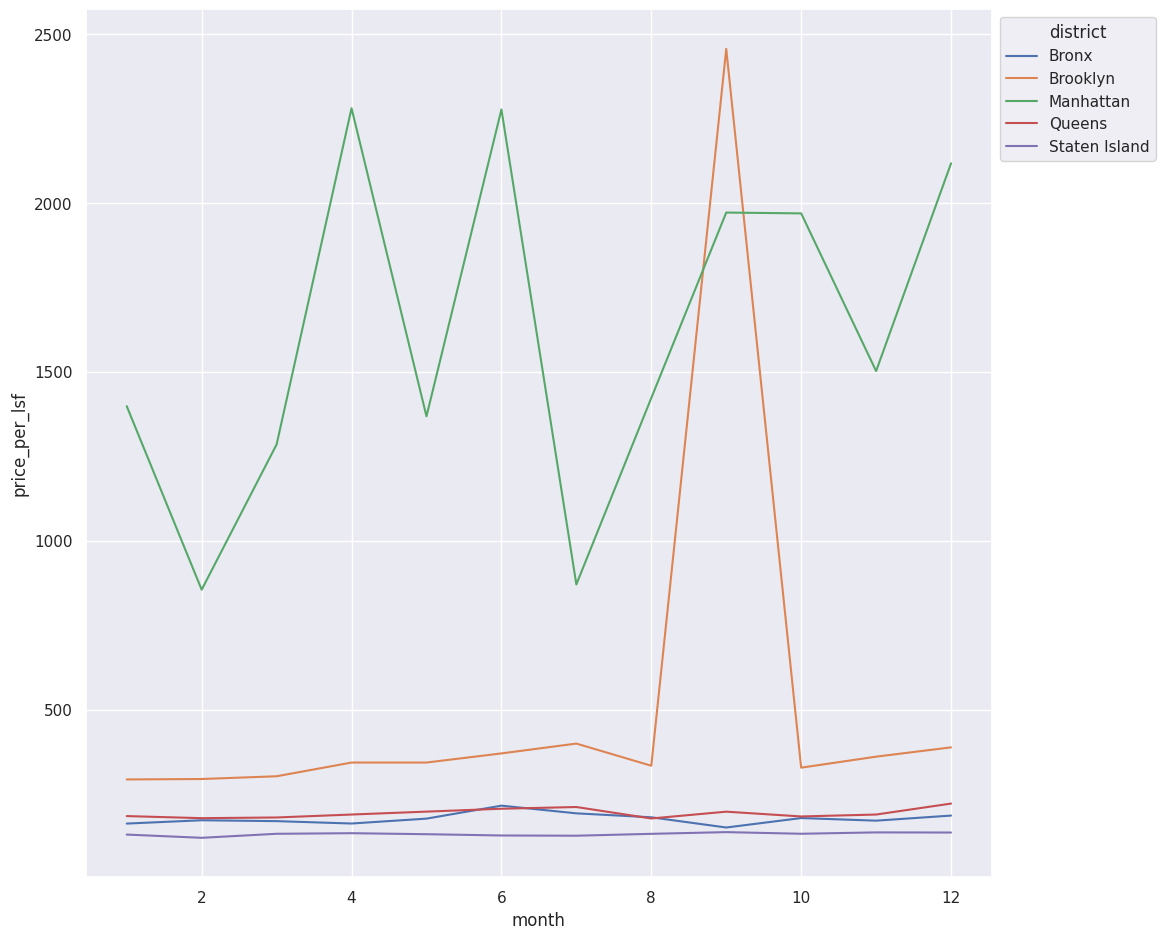

In [185]:
sns.set(rc={'figure.figsize':(11.7,11.27)})
ax = sns.lineplot(data=houses_by_borough, x=houses_by_borough.month, y=houses_by_borough.price_per_lsf, hue=houses_by_borough.district)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

[Text(0, 0, '01  ONE FAMILY HOMES                        '),
 Text(1, 0, '02  TWO FAMILY HOMES                        '),
 Text(2, 0, '03  THREE FAMILY HOMES                      '),
 Text(3, 0, '05  TAX CLASS 1 VACANT LAND                 '),
 Text(4, 0, '07  RENTALS - WALKUP APARTMENTS             '),
 Text(5, 0, '08  RENTALS - ELEVATOR APARTMENTS           '),
 Text(6, 0, '09  COOPS - WALKUP APARTMENTS               '),
 Text(7, 0, '10  COOPS - ELEVATOR APARTMENTS             '),
 Text(8, 0, '11A CONDO-RENTALS                           '),
 Text(9, 0, '14  RENTALS - 4-10 UNIT                     '),
 Text(10, 0, '17  CONDOPS                                 '),
 Text(11, 0, '21  OFFICE BUILDINGS                        '),
 Text(12, 0, '22  STORE BUILDINGS                         '),
 Text(13, 0, '23  LOFT BUILDINGS                          '),
 Text(14, 0, '25  LUXURY HOTELS                           '),
 Text(15, 0, '26  OTHER HOTELS                            '),
 Text(16, 0, '27  

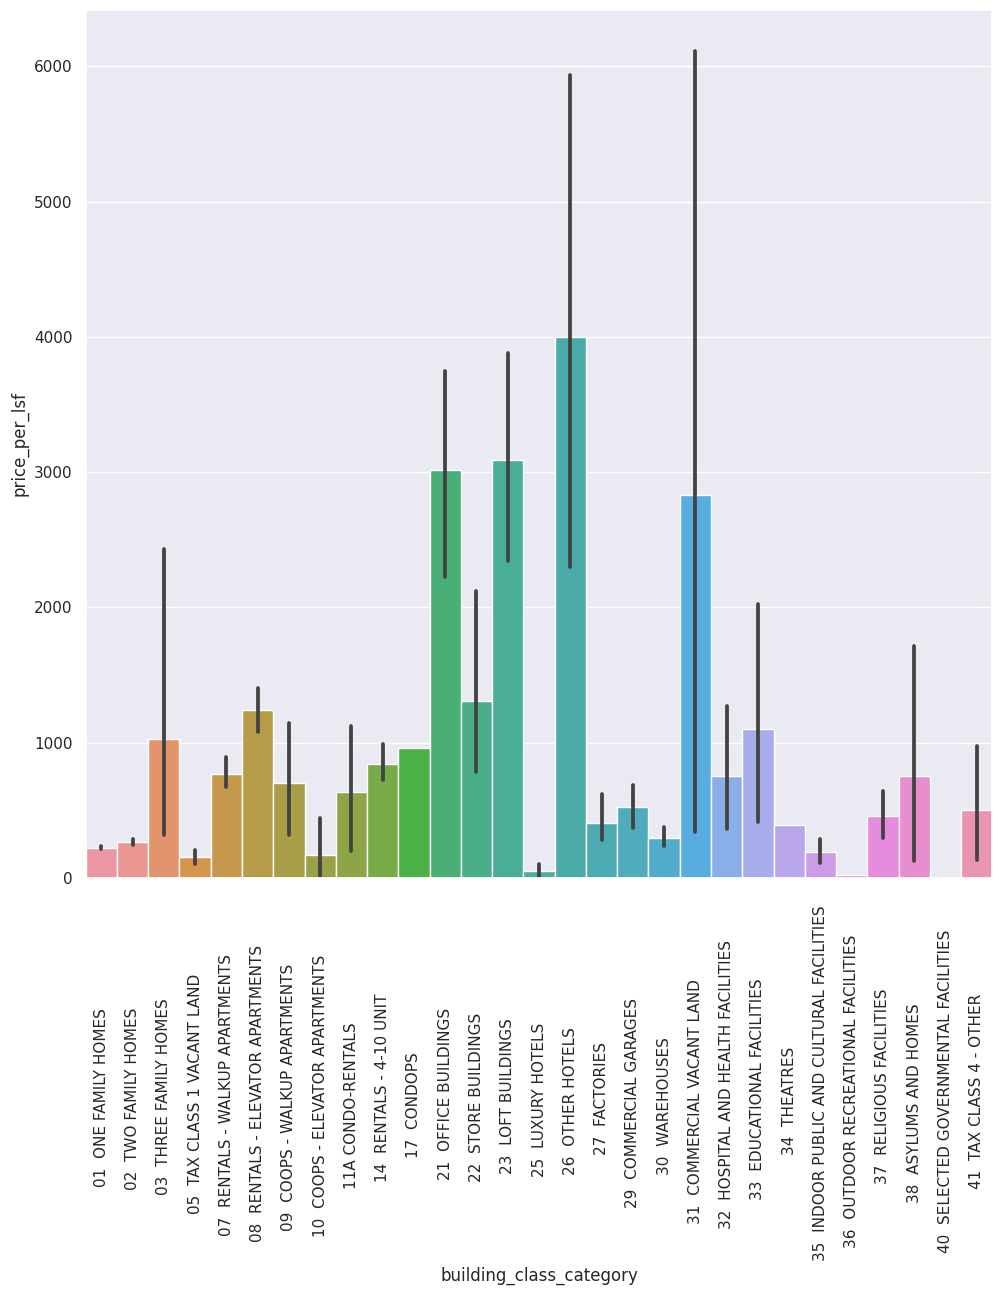

In [186]:
houses_by_bcc = houses_on_sale[houses_on_sale['price_per_lsf'] > 0].drop(columns=["sale_date", "address", "zip_code", "block", "lot", "ease_ment", "building_class_at_present", "residential_units", "commercial_units", "total_units", "year_built"]).groupby(['building_class_category', 'month'], as_index=False).mean()
ax = sns.barplot(data=houses_by_bcc, x=houses_by_bcc.building_class_category, y=houses_by_bcc.price_per_lsf, width=1)
ax.set_xticklabels(labels=houses_by_bcc['building_class_category'].unique(), rotation=90)